In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from imblearn.ensemble import BalancedRandomForestClassifier

import joblib
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[DataSet](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

This dataset contains 5110 rows with 12 different characteristics:

- **id**: unique identifier;
- **gender**: the patient's gender ("Male", "Female" or "Other");
- **age**: patient's age;
- **hypertension**: the presence of hypertension (0 - no, 1 - yes);
- **heart_disease**: presence of heart disease (0 - no, 1 - yes);
- **ever_married**: marriage status ("No" or "Yes");
- **work_type**: type of work ("children", "Govt_jov", "Never_worked", "Private" or "Self-employed");
- **Residence_type**: type of residence ("Rural" or "Urban");
- **avg_glucose_level**: average blood glucose level;
- **bmi**: body mass index;
- **smoking_status**: smoking status ("formerly smoked", "never smoked", "smokes" or "Unknown");
- **stroke**: whether a stroke has occurred (0 - no, 1 - yes).



In [37]:
file_path = '/content/drive/My Drive/Colab Notebooks/Colab/Stroke/strokeDataSet.csv'
df = pd.read_csv(file_path)

In [38]:
df = pd.read_csv(file_path)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [39]:
df.shape

(5110, 12)

In [40]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [41]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [43]:
df_col = df.columns

df_col

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [44]:
df.duplicated().sum()

0

In [45]:
df["stroke"].value_counts()

,count
stroke,
0,4861
1,249


# ***Categorical***

In [46]:
categorical = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables are:', len(categorical))

df[categorical].head()

Number of categorical variables are: 5


,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [47]:
df[categorical].isnull().sum()

,0
gender,0
ever_married,0
work_type,0
Residence_type,0
smoking_status,0


In [48]:
for var in categorical:
    print("+" * 40)
    print(df[var].value_counts())

++++++++++++++++++++++++++++++++++++++++
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [49]:
for feature in categorical:
    print('Feature', feature, 'has', df[feature].nunique(), 'labels')

Feature gender has 3 labels
Feature ever_married has 2 labels
Feature work_type has 5 labels
Feature Residence_type has 2 labels
Feature smoking_status has 4 labels


In [50]:
df = df[df['gender'] != 'Other']

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# ***Numerical***



In [51]:
numerical = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables are:', len(numerical))

df[numerical].head()

Number of numerical variables are: 7


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1


In [52]:
df[numerical].isnull().sum()

,0
id,0
age,0
hypertension,0
heart_disease,0
avg_glucose_level,0
bmi,201
stroke,0


In [53]:
# Заповнення пропущених значень медіанним
df.loc[:, 'bmi'] = df['bmi'].fillna(df['bmi'].median())

In [54]:
df[numerical].isnull().sum()

,0
id,0
age,0
hypertension,0
heart_disease,0
avg_glucose_level,0
bmi,0
stroke,0


***Викиди у числових змінних***


In [55]:
print(round(df[numerical].describe()),2)

            id     age  hypertension  heart_disease  avg_glucose_level  \
count   5109.0  5109.0        5109.0         5109.0             5109.0   
mean   36514.0    43.0           0.0            0.0              106.0   
std    21162.0    23.0           0.0            0.0               45.0   
min       67.0     0.0           0.0            0.0               55.0   
25%    17740.0    25.0           0.0            0.0               77.0   
50%    36922.0    45.0           0.0            0.0               92.0   
75%    54643.0    61.0           0.0            0.0              114.0   
max    72940.0    82.0           1.0            1.0              272.0   

          bmi  stroke  
count  5109.0  5109.0  
mean     29.0     0.0  
std       8.0     0.0  
min      10.0     0.0  
25%      24.0     0.0  
50%      28.0     0.0  
75%      33.0     0.0  
max      98.0     1.0   2



блок-діаграми, щоб візуалізувати викиди у вищезгаданих змінних.

Text(0, 0.5, 'bmi')

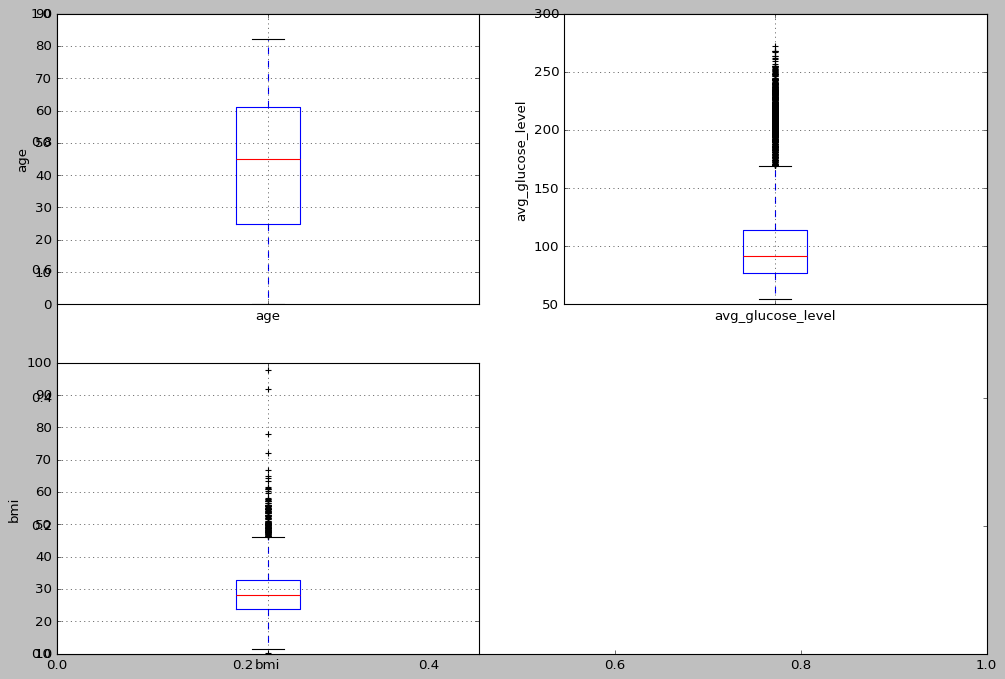

In [56]:
plt.figure(figsize=(15,10))
sns.countplot(palette='bright')

plt.subplot(2, 2, 1)
fig = df.boxplot(column='age')
fig.set_title('')
fig.set_ylabel('age')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='avg_glucose_level')
fig.set_title('')
fig.set_ylabel('avg_glucose_level')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='bmi')
fig.set_title('')
fig.set_ylabel('bmi')


Тепер я побудую гістограми, щоб перевірити розподіл і з'ясувати, чи є він нормальним або асиметричним. Якщо змінна має нормальний розподіл, то я проведу «Аналіз екстремальних значень», якщо ж розподіл асиметричний, то знайду IQR (міжквартильний розмах).

Text(0, 0.5, 'stroke')

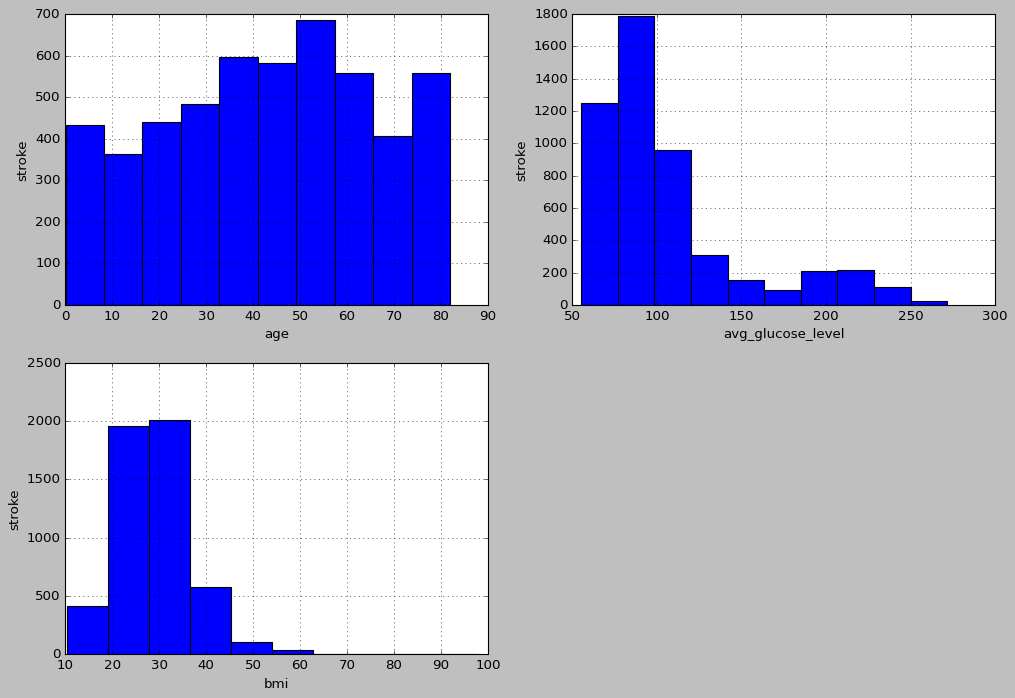

In [57]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
fig = df.age.hist(bins=10)
fig.set_xlabel('age')
fig.set_ylabel('stroke')

plt.subplot(2, 2, 2)
fig = df.avg_glucose_level.hist(bins=10)
fig.set_xlabel('avg_glucose_level')
fig.set_ylabel('stroke')


plt.subplot(2, 2, 3)
fig = df.bmi.hist(bins=10)
fig.set_xlabel('bmi')
fig.set_ylabel('stroke')

Ми бачимо, що змінні є асиметричними. Тому я використаю інтерквартильний розмах, щоб знайти викиди.

In [58]:
# age_IQR = df.age.quantile(0.75) - df.age.quantile(0.25)
# age_lower_fence = df.age.quantile(0.25) - (age_IQR * 1.5)
# age_upper_fence = df.age.quantile(0.75) + (age_IQR * 1.5)
# print('age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=age_lower_fence, upperboundary=age_upper_fence))

# glucose_IQR = df.avg_glucose_level.quantile(0.75) - df.avg_glucose_level.quantile(0.25)
# glucose_lower_fence = df.avg_glucose_level.quantile(0.25) - (glucose_IQR * 1.5)
# glucose_upper_fence = df.avg_glucose_level.quantile(0.75) + (glucose_IQR * 1.5)

# print('avg_glucose_level outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=glucose_lower_fence, upperboundary=glucose_upper_fence))

# bmi_IQR = df.bmi.quantile(0.75) - df.bmi.quantile(0.25)
# bmi_lower_fence = df.bmi.quantile(0.25) - (bmi_IQR * 1.5)
# bmi_upper_fence = df.bmi.quantile(0.75) + (bmi_IQR * 1.5)
# print('bmi outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=bmi_lower_fence, upperboundary=bmi_upper_fence))

Обрізаємо викиди

In [59]:
# df.loc[df['age'] > age_upper_fence, 'age'] = age_upper_fence
# df.loc[df['age'] < age_lower_fence, 'age'] = age_lower_fence

# df.loc[df['avg_glucose_level'] > glucose_upper_fence, 'avg_glucose_level'] = glucose_upper_fence
# df.loc[df['avg_glucose_level'] < glucose_lower_fence, 'avg_glucose_level'] = glucose_lower_fence

# df.loc[df['bmi'] > bmi_upper_fence, 'bmi'] = bmi_upper_fence
# df.loc[df['bmi'] < bmi_lower_fence, 'bmi'] = bmi_lower_fence

In [60]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.863300,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.699785,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.100000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [61]:
stroke_counts = df['stroke'].value_counts()

print(stroke_counts)

stroke
0    4860
1     249
Name: count, dtype: int64


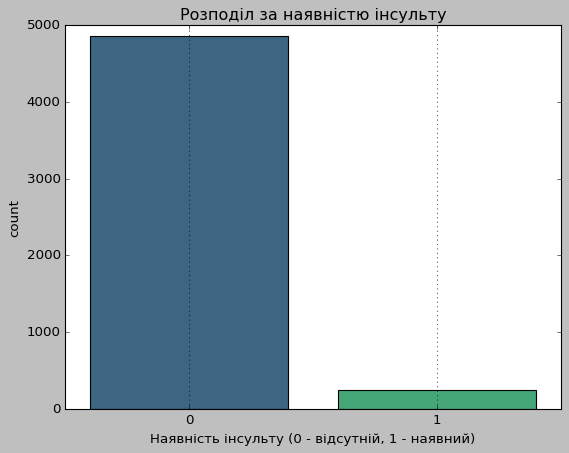

In [62]:
sns.countplot(x='stroke', data=df, hue='stroke', palette='viridis', dodge=False, legend=False)
plt.title('Розподіл за наявністю інсульту')
plt.xlabel('Наявність інсульту (0 - відсутній, 1 - наявний)')
plt.ylabel('count')
plt.grid(axis="x", linewidth = 0.6)
plt.show()

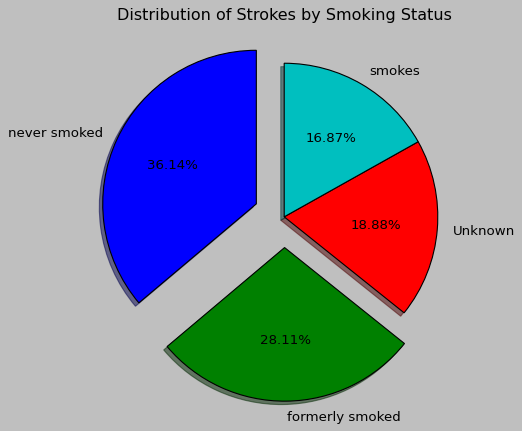

In [63]:
explode = (0.2, 0.2, 0, 0)
df.groupby('smoking_status')['stroke'].sum().nlargest(5).plot(kind='pie', autopct='%1.2f%%',  startangle=90,  title='Distribution of Strokes by Smoking Status'
                                                         ,explode=explode, shadow=True, ylabel='');

In [64]:
grouped_data = df.groupby('gender')['stroke'].count()

print(grouped_data)

gender
Female    2994
Male      2115
Name: stroke, dtype: int64


In [65]:
grouped_data = df.groupby(['gender', 'stroke']).size()
print(grouped_data)

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
dtype: int64


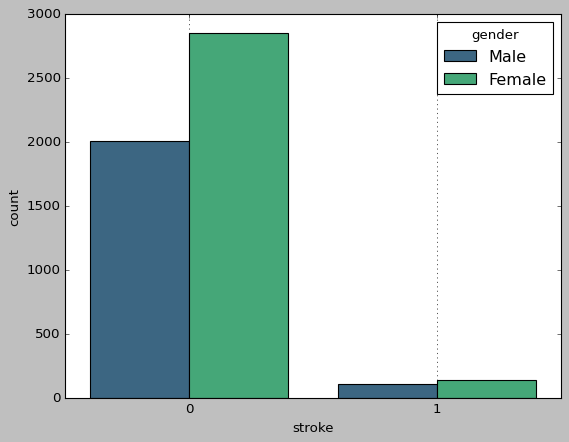

In [66]:
plt.style.use("classic")
sns.countplot(data=df, x="stroke", hue='gender', palette='viridis')
plt.title('')
plt.grid(axis="x", linewidth = 0.6)
plt.show()

In [67]:
df[categorical].head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [68]:
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ['ever_married', 'gender', 'work_type', 'Residence_type', 'smoking_status']

print("Data types for encoding:")
print(df[columns_to_encode].dtypes)

df.loc[:, columns_to_encode] = df.loc[:, columns_to_encode].astype(str)

encoder = OneHotEncoder(sparse_output=False)

encoded_array = encoder.fit_transform(df[columns_to_encode])

encoded_columns = encoder.get_feature_names_out(columns_to_encode)

encoded_df = pd.DataFrame(encoded_array, columns=encoded_columns, index=df.index)

df = pd.concat([df.drop(columns=columns_to_encode), encoded_df], axis=1)

print(df.head())

Data types for encoding:
ever_married      object
gender            object
work_type         object
Residence_type    object
smoking_status    object
dtype: object
      id   age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0   9046  67.0             0              1             228.69  36.6       1   
1  51676  61.0             0              0             202.21  28.1       1   
2  31112  80.0             0              1             105.92  32.5       1   
3  60182  49.0             0              0             171.23  34.4       1   
4   1665  79.0             1              0             174.12  24.0       1   

   ever_married_No  ever_married_Yes  gender_Female  ...  \
0              0.0               1.0            0.0  ...   
1              0.0               1.0            1.0  ...   
2              0.0               1.0            0.0  ...   
3              0.0               1.0            1.0  ...   
4              0.0               1.0            1.0  ..

[get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

Метод pd.get_dummies() створює dummy-колонки для кожного категоричного значення. Це означає, що він перетворює кожну категорію на окрему бінарну колонку.

In [ ]:
# df = pd.get_dummies(df, columns=['ever_married', 'gender', 'work_type', 'Residence_type', 'smoking_status'])

# df

In [69]:
df.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'ever_married_No', 'ever_married_Yes', 'gender_Female',
       'gender_Male', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5109 non-null   int64  
 1   age                             5109 non-null   float64
 2   hypertension                    5109 non-null   int64  
 3   heart_disease                   5109 non-null   int64  
 4   avg_glucose_level               5109 non-null   float64
 5   bmi                             5109 non-null   float64
 6   stroke                          5109 non-null   int64  
 7   ever_married_No                 5109 non-null   float64
 8   ever_married_Yes                5109 non-null   float64
 9   gender_Female                   5109 non-null   float64
 10  gender_Male                     5109 non-null   float64
 11  work_type_Govt_job              5109 non-null   float64
 12  work_type_Never_worked          5109 no

In [71]:
correlation_matrix = df.drop(columns='id').corr()
correlation_matrix

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_No,ever_married_Yes,gender_Female,gender_Male,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.276367,0.263777,0.238323,0.324211,0.245239,-0.679084,0.679084,0.027752,-0.027752,...,-0.078667,0.116678,0.327949,-0.634320,-0.014031,0.014031,-0.378366,0.237347,0.119207,0.073075
hypertension,0.276367,1.000000,0.108292,0.174540,0.158252,0.127891,-0.164187,0.164187,-0.021223,0.021223,...,-0.021612,-0.005358,0.115417,-0.129535,0.007980,-0.007980,-0.141551,0.059022,0.065018,0.031213
heart_disease,0.263777,0.108292,1.000000,0.161907,0.036879,0.134905,-0.114601,0.114601,-0.085685,0.085685,...,-0.015715,0.000068,0.086742,-0.091654,-0.003045,0.003045,-0.066765,0.066938,-0.021893,0.044030
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.167033,0.131991,-0.155329,0.155329,-0.054722,0.054722,...,-0.014665,0.016451,0.062770,-0.102195,0.004783,-0.004783,-0.095035,0.067796,0.024011,0.017716
bmi,0.324211,0.158252,0.036879,0.167033,1.000000,0.036075,-0.334770,0.334770,0.026452,-0.026452,...,-0.028340,0.204057,0.070094,-0.442204,0.000444,-0.000444,-0.265052,0.103948,0.107524,0.084329
stroke,0.245239,0.127891,0.134905,0.131991,0.036075,1.000000,-0.108299,0.108299,-0.009081,0.009081,...,-0.014885,0.011927,0.062150,-0.083888,-0.015415,0.015415,-0.055924,0.064683,-0.004163,0.008920
ever_married_No,-0.679084,-0.164187,-0.114601,-0.155329,-0.334770,-0.108299,1.000000,-1.000000,-0.030171,0.030171,...,0.090873,-0.154104,-0.192637,0.544658,0.005988,-0.005988,0.332335,-0.171960,-0.102663,-0.105132
ever_married_Yes,0.679084,0.164187,0.114601,0.155329,0.334770,0.108299,-1.000000,1.000000,0.030171,-0.030171,...,-0.090873,0.154104,0.192637,-0.544658,-0.005988,0.005988,-0.332335,0.171960,0.102663,0.105132
gender_Female,0.027752,-0.021223,-0.085685,-0.054722,0.026452,-0.009081,-0.030171,0.030171,1.000000,-1.000000,...,-0.011486,0.032502,0.026045,-0.089226,-0.006105,0.006105,-0.059557,-0.043121,0.098952,-0.011408
gender_Male,-0.027752,0.021223,0.085685,0.054722,-0.026452,0.009081,0.030171,-0.030171,-1.000000,1.000000,...,0.011486,-0.032502,-0.026045,0.089226,0.006105,-0.006105,0.059557,0.043121,-0.098952,0.011408


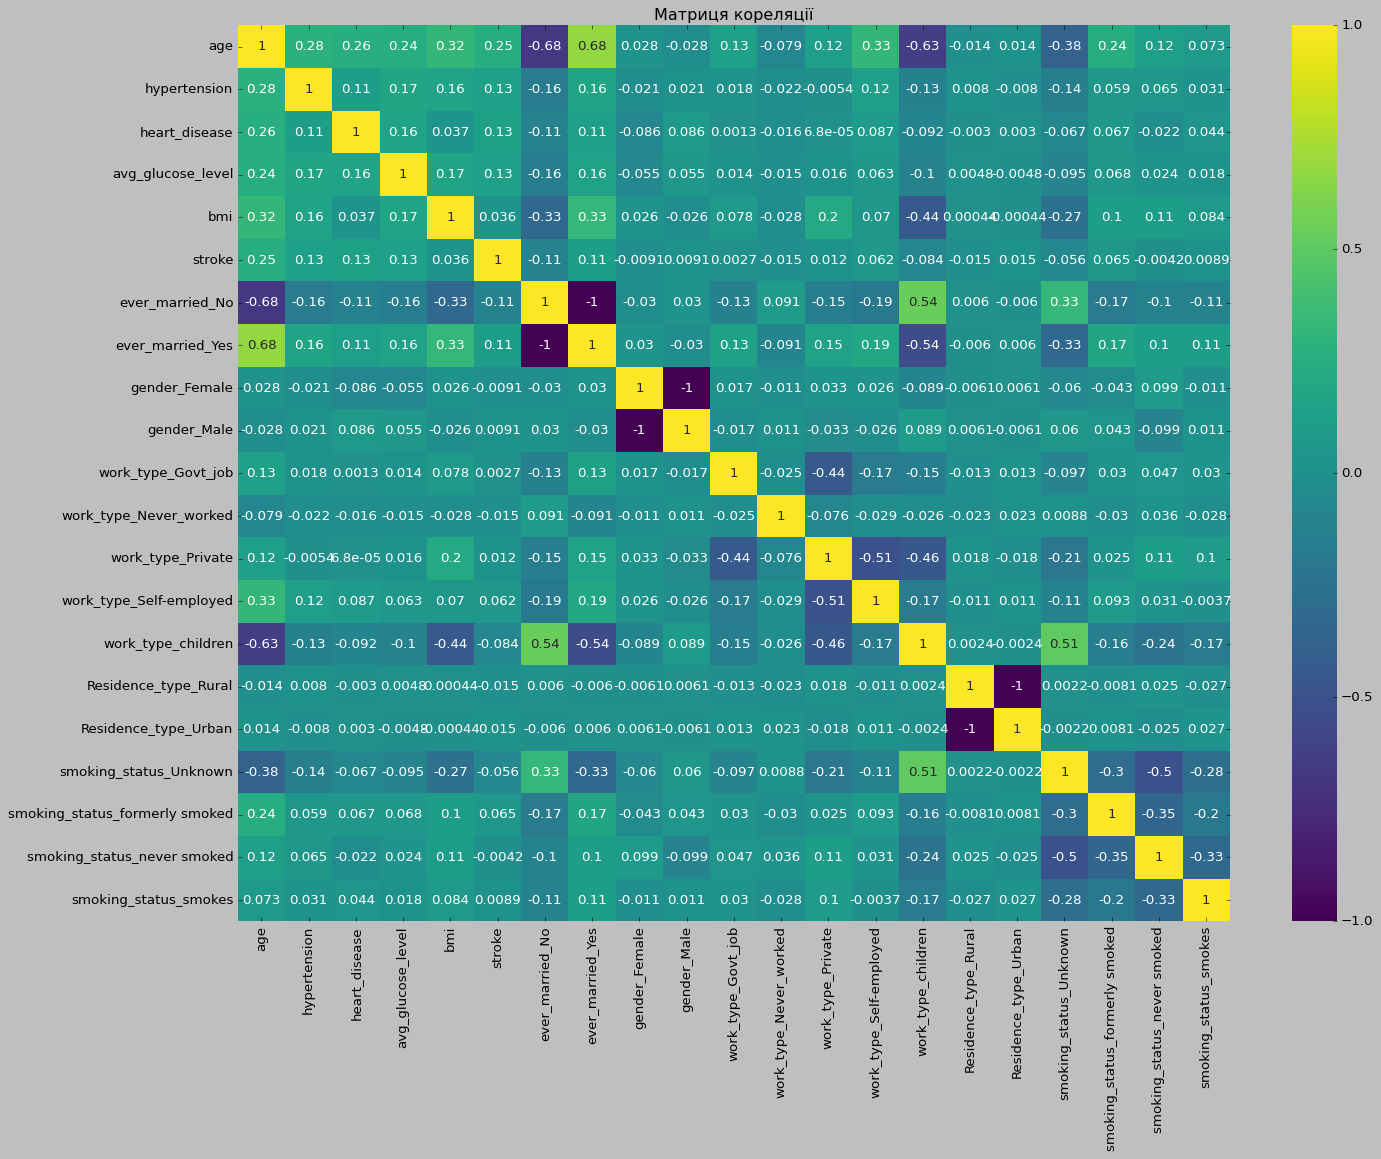

In [72]:
plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title("Матриця кореляції")
plt.show()

In [73]:
correlation_with_stroke = correlation_matrix['stroke'].sort_values(ascending=False)

correlation_with_stroke

,stroke
stroke,1.000000
age,0.245239
heart_disease,0.134905
avg_glucose_level,0.131991
hypertension,0.127891
ever_married_Yes,0.108299
smoking_status_formerly smoked,0.064683
work_type_Self-employed,0.062150
bmi,0.036075
Residence_type_Urban,0.015415


# ***Результати кореляції:***

❌ ***Позитивний зв'язок з ризиком інсульту***:

***age***: 0.245239 - старші люди мають більший ризик;

***heart_disease***: 0.134905 - люди з серцевими захворюваннями мають більший ризик інсульту;

***hypertension***: 0.127891 - люди з гіпертонією мають більший ризик інсульту;

***avg_glucose_level***: 0.131991 - вищий рівень глюкози асоціюється з більшим ризиком інсульту;

***ever_married_Yes***: 0.108299 - одружені люди мають трохи більший ризик інсульту;

***smoking_status_formerly smoked***: 0.064683 - колишні курці мають більший ризик інсульту;

***work_type_Self-employed***: 0.062150 -  самозайняті особи мають більший ризик інсульту;

***bmi***: 0.036075 - вищий індекс маси тіла асоціюється з більшим ризиком інсульту;

---



❗***Позитивний, але дуже слабкий зв'язок***:

***Residence_type_Urban***: 0.015415 -  міське місце проживання;

***work_type_Private***: 0.011927 - робота у приватному секторі;

***gender_Male***: 0.009081 - чоловіча стать;

***smoking_status_smokes***: 0.008920 - курці;

***work_type_Govt_job***: 0.002660 - робота на державній службі;



---

❎ ***Негативний, але дуже слабкий зв'язок***:

***smoking_status_never smoked***: -0.004163 - люди, які ніколи не курили;

***gender_Female***: -0.009081 - жіноча стать;

***work_type_Never_worked***: -0.014885 - які ніколи не працювали;

***Residence_type_Rural***: -0.015415 - сільське місце проживання;


---

✅ ***Негативний зв'язок***:

***smoking_status_Unknown***: -0.055924 - люди з невідомим статусом куріння;

***work_type_children***: -0.083888 - діти мають менший ризик інсульту;

***ever_married_No***: -0.108299 - неодружені люди мають менший ризик інсульту.

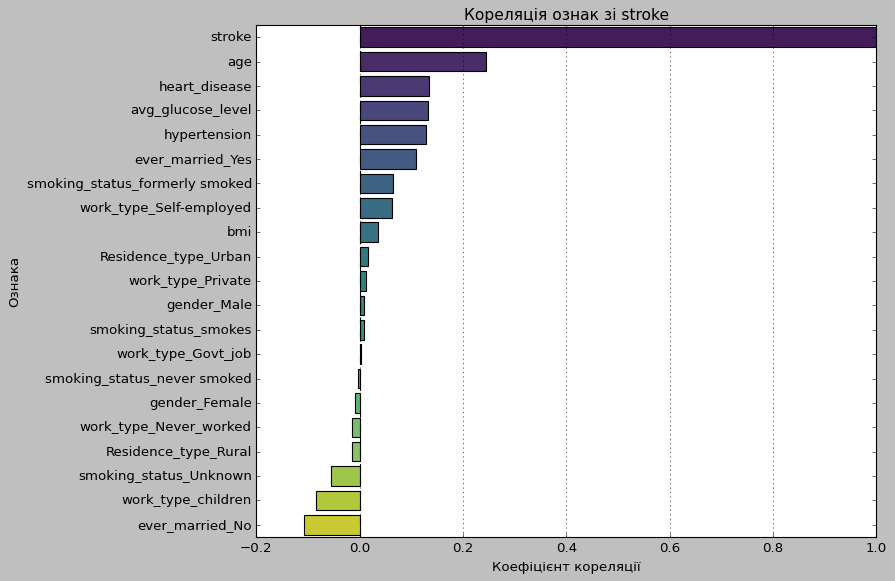

In [74]:
plt.figure(figsize=(10, 8))
sns.barplot(
    x=correlation_with_stroke.values,
    y=correlation_with_stroke.index,
    hue=correlation_with_stroke.index,
    dodge=False,
    palette="viridis",
    legend=False
    )

plt.title("Кореляція ознак зі stroke", fontsize=14)
plt.xlabel("Коефіцієнт кореляції", fontsize=12)
plt.ylabel("Ознака", fontsize=12)
plt.axvline(0, color="black", linestyle="--")
plt.grid(axis="x", linewidth=0.6)
plt.show()

In [75]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_No,ever_married_Yes,gender_Female,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,51676,61.0,0,0,202.21,28.1,1,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,80.0,0,1,105.92,32.5,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60182,49.0,0,0,171.23,34.4,1,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665,79.0,1,0,174.12,24.0,1,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# ***Model Training¶***

In [76]:
X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']

print(X.shape)
print(y.shape)

(5109, 20)
(5109,)


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4087, 20) (1022, 20)
(4087,) (1022,)


In [78]:
scaler = RobustScaler()

num_features = ['age', 'avg_glucose_level', 'bmi']

X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [79]:
print(X_train.shape, X_test.shape)

(4087, 20) (1022, 20)


In [80]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_No,ever_married_Yes,gender_Female,gender_Male,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2970,-0.638889,0,0,0.587234,-0.922222,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3593,-0.055556,0,0,-0.118325,1.288889,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4280,-0.750000,0,0,-0.078792,0.900000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2241,-1.111111,0,0,-0.494990,-0.366667,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
449,-0.083333,0,0,-0.645985,0.322222,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [81]:
kf = KFold(shuffle=True, n_splits=5)

# ***LogisticRegression***

In [82]:
param_grid_log = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': [0.5],
    'class_weight': ['balanced']
}

In [83]:
log_model = LogisticRegression(max_iter=5000, solver='saga')

grid_search_log = GridSearchCV(log_model, param_grid_log, cv=kf, scoring='balanced_accuracy', n_jobs=-1, verbose=2)

grid_search_log.fit(X_train, y_train)

print("Найкращі параметри:", grid_search_log.best_params_)

best_log_model = grid_search_log.best_estimator_

# Прогноз на тренувальних даних
y_pred_train_log = best_log_model.predict(X_train)
y_pred_proba_train_log = best_log_model.predict_proba(X_train)[:, 1]

# Прогноз на тестових даних
y_pred_test_log = best_log_model.predict(X_test)
y_pred_proba_test_log = best_log_model.predict_proba(X_test)[:, 1]

# Перевірка точності на тренувальних даних
print("\nLogisticRegression on Train Data:")
print(classification_report(y_train, y_pred_train_log, zero_division=0))
print(confusion_matrix(y_train, y_pred_train_log))

# Перевірка точності на тренувальних даних
print("\nLogisticRegression on Test Data:")
print(classification_report(y_test, y_pred_test_log, zero_division=0))
print(confusion_matrix(y_test, y_pred_test_log))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Найкращі параметри: {'C': 0.1, 'class_weight': 'balanced', 'l1_ratio': 0.5, 'penalty': 'elasticnet'}

LogisticRegression on Train Data:
              precision    recall  f1-score   support

           0       0.99      0.74      0.84      3888
           1       0.14      0.83      0.24       199

    accuracy                           0.74      4087
   macro avg       0.56      0.79      0.54      4087
weighted avg       0.95      0.74      0.81      4087

[[2861 1027]
 [  33  166]]

LogisticRegression on Test Data:
              precision    recall  f1-score   support

           0       0.98      0.74      0.85       972
           1       0.13      0.74      0.22        50

    accuracy                           0.74      1022
   macro avg       0.56      0.74      0.53      1022
weighted avg       0.94      0.74      0.81      1022

[[721 251]
 [ 13  37]]


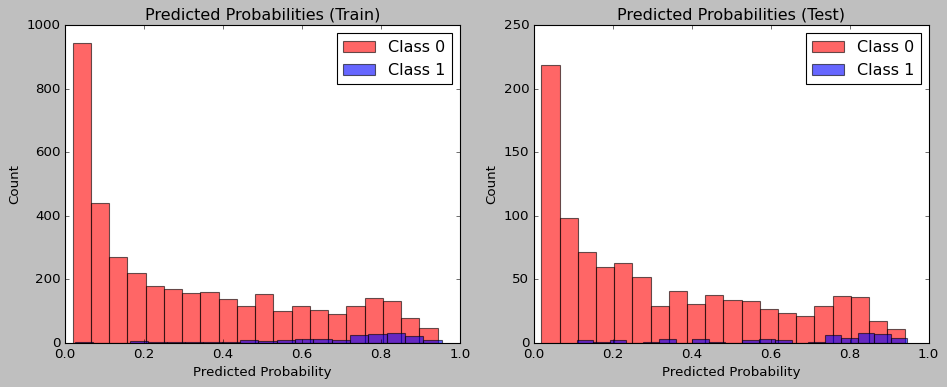

In [84]:
def plot_predicted_probabilities(y_train, y_train_proba, y_test, y_test_proba):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 рядок, 2 стовпці

    # Гістограма для Train
    axes[0].hist(y_train_proba[y_train == 0], bins=20, alpha=0.6, color='red', label='Class 0')
    axes[0].hist(y_train_proba[y_train == 1], bins=20, alpha=0.6, color='blue', label='Class 1')
    axes[0].set_xlabel("Predicted Probability")
    axes[0].set_ylabel("Count")
    axes[0].set_title("Predicted Probabilities (Train)")
    axes[0].legend()

    # Гістограма для Test
    axes[1].hist(y_test_proba[y_test == 0], bins=20, alpha=0.6, color='red', label='Class 0')
    axes[1].hist(y_test_proba[y_test == 1], bins=20, alpha=0.6, color='blue', label='Class 1')
    axes[1].set_xlabel("Predicted Probability")
    axes[1].set_ylabel("Count")
    axes[1].set_title("Predicted Probabilities (Test)")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

plot_predicted_probabilities(y_train, y_pred_proba_train_log, y_test, y_pred_proba_test_log)


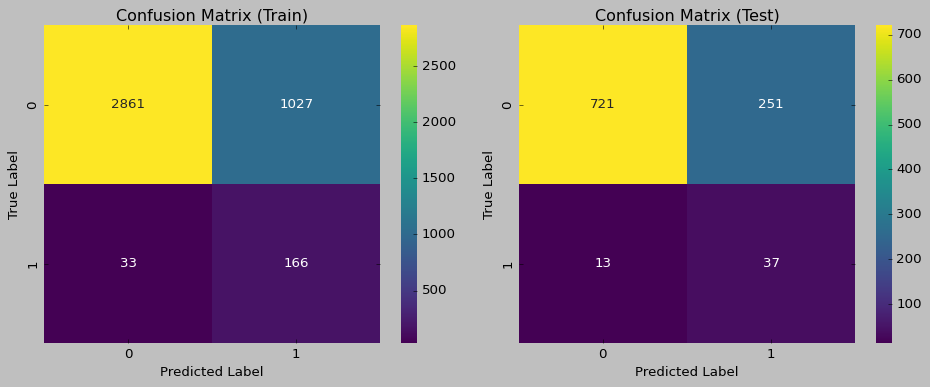

In [85]:
def plot_confusion_matrices(y_train, y_train_pred, y_test, y_test_pred):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Матриця для Train
    cm_train = confusion_matrix(y_train, y_train_pred)
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='viridis', xticklabels=[0,1], yticklabels=[0,1], ax=axes[0])
    axes[0].set_xlabel("Predicted Label")
    axes[0].set_ylabel("True Label")
    axes[0].set_title("Confusion Matrix (Train)")

    # Матриця для Test
    cm_test = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='viridis', xticklabels=[0,1], yticklabels=[0,1], ax=axes[1])
    axes[1].set_xlabel("Predicted Label")
    axes[1].set_ylabel("True Label")
    axes[1].set_title("Confusion Matrix (Test)")

    plt.tight_layout()
    plt.show()

plot_confusion_matrices(y_train, y_pred_train_log, y_test, y_pred_test_log)


***LogisticRegression з elasticnet***

Результати на тренувальних і тестових даних:

Для класу 0 – високі precision -0.98 і стабільний recall - 0.73.

Для класу 1 – дуже низькі precision - 0.12 та f1-score – 0.24, хоча recall трохи вищий - 0.83.

***Висновок:***

Логістична регресія з elasticnet, при використанні l1_ratio=0.5, забезпечує стабільну продуктивність для основного класу, але не здатна адекватно розпізнавати менш представлений клас. Це може свідчити про те, що модель недостатньо диференціює важливі ознаки, що впливають на позитивний клас.

# ***DecisionTreeClassifier¶***

In [86]:
param_grid_dt = {
        'max_depth': [None],
        'min_samples_split': [10],
        'min_samples_leaf': [4],
        'max_features': [None],
        'class_weight': ['balanced'],
}

# param_grid_dt = {
#         'max_depth': [None, 10, 20, 30],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4],
#         'max_features': [None, 'sqrt', 'log2'],
#         'class_weight': ['balanced'],
# }

In [87]:
dt_model = DecisionTreeClassifier(random_state=42)

grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=kf, scoring='balanced_accuracy', n_jobs=-1, verbose=2)

grid_search_dt.fit(X_train, y_train)

print("Найкращі параметри:", grid_search_dt.best_params_)

best_dt_model = grid_search_dt.best_estimator_

# Прогноз на тренувальних даних
y_pred_train_dt = best_dt_model.predict(X_train)
y_pred_proba_train_dt = best_dt_model.predict_proba(X_train)[:, 1]

# Прогноз на тестових даних
y_pred_test_dt = best_dt_model.predict(X_test)
y_pred_proba_test_dt = best_dt_model.predict_proba(X_test)[:, 1]

# Перевірка точності на тренувальних даних
print("\DecisionTreeClassifier on Train Data:")
print(classification_report(y_train, y_pred_train_dt, zero_division=0))
print(confusion_matrix(y_train, y_pred_train_dt))

# Перевірка точності на тестових даних
print("\DecisionTreeClassifier on Test Data:")
print(classification_report(y_test, y_pred_test_dt, zero_division=0))
print(confusion_matrix(y_test, y_pred_test_dt))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Найкращі параметри: {'class_weight': 'balanced', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
\DecisionTreeClassifier on Train Data:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      3888
           1       0.44      1.00      0.61       199

    accuracy                           0.94      4087
   macro avg       0.72      0.97      0.79      4087
weighted avg       0.97      0.94      0.95      4087

[[3638  250]
 [   0  199]]
\DecisionTreeClassifier on Test Data:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       972
           1       0.14      0.32      0.20        50

    accuracy                           0.87      1022
   macro avg       0.55      0.61      0.56      1022
weighted avg       0.92      0.87      0.89      1022

[[875  97]
 [ 34  16]]


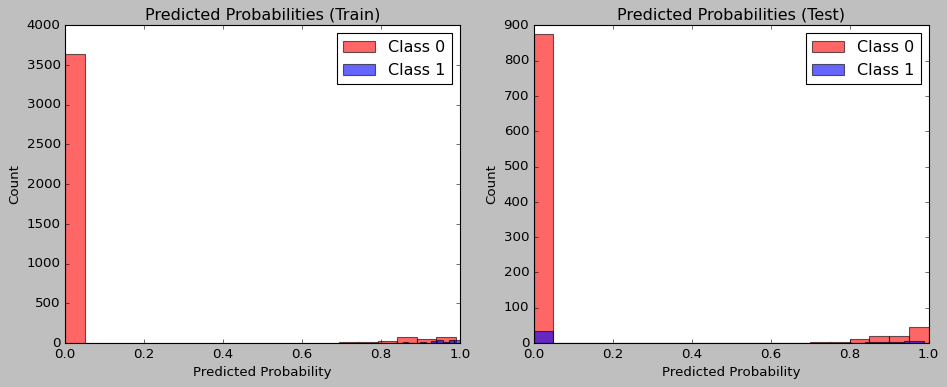

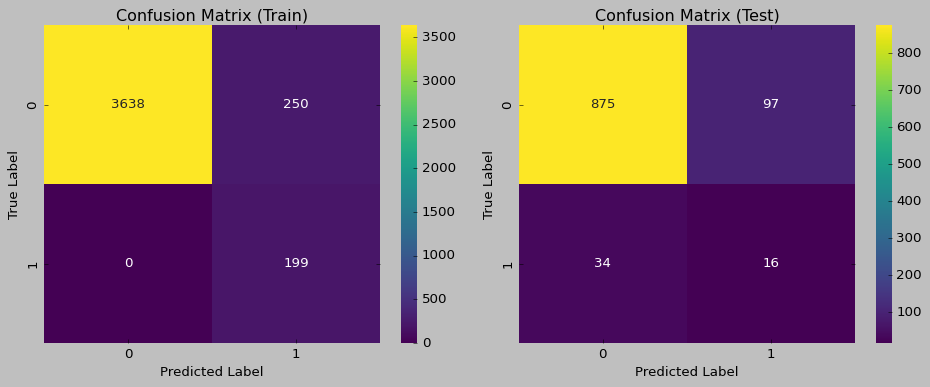

In [88]:
plot_predicted_probabilities(y_train, y_pred_proba_train_dt, y_test, y_pred_proba_test_dt)
plot_confusion_matrices(y_train, y_pred_train_dt, y_test, y_pred_test_dt)

#***Аналіз DecisionTreeClassifier:***

Результати на тренувальних даних:

Клас 0 – високий recall (0.87) та добрий f1 (0.93).
Клас 1 – високий recall (0.98) але низький precision (0.28), що призводить до f1-score 0.44.

Результати на тестових даних:

Для класу 1 показники знижується: recall 0.62 і precision 0.17, що дає f1-score 0.26.

***Висновок***:

Дерево рішень демонструє здатність "зловити" більшість позитивних прикладів - високий recall, але за рахунок великої кількості помилкових спрацьовувань низька precision. Можливо, модель занадто сильно адаптується до тренувальних даних overfitting, що погіршує її узагальнення.

# ***RandomForestClassifier***

In [89]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt'],
    'class_weight': ['balanced'],
}

# param_grid_rf = {
#     'n_estimators': [50],
#     'max_depth': [10],
#     'min_samples_split': [10],
#     'min_samples_leaf': [2],
#     'max_features': [None],
#     'class_weight': ['balanced'],
# }

In [90]:
rf_model = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=kf, scoring='balanced_accuracy', n_jobs=-1, verbose=2)

# grid_search_rf.fit(X_train_resampled, y_train_resampled)

grid_search_rf.fit(X_train, y_train)

print("Найкращі параметри:", grid_search_rf.best_params_)

best_rf_model = grid_search_rf.best_estimator_

# Прогноз на тренувальних даних
y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_proba_train_rf = best_rf_model.predict_proba(X_train)[:, 1]

# Прогноз на тестових даних
y_pred_test_rf = best_rf_model.predict(X_test)
y_pred_proba_test_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Перевірка точності на тренувальних даних
print("\nRandomForestClassifier on Train Data:")
print(classification_report(y_train, y_pred_train_rf, zero_division=0))
print(confusion_matrix(y_train, y_pred_train_rf))

# Перевірка точності на тестових даних
print("\nRandomForestClassifier on Test Data:")
print(classification_report(y_test, y_pred_test_rf, zero_division=0))
print(confusion_matrix(y_test, y_pred_test_rf))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Найкращі параметри: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}

RandomForestClassifier on Train Data:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      3888
           1       0.49      0.97      0.66       199

    accuracy                           0.95      4087
   macro avg       0.75      0.96      0.81      4087
weighted avg       0.97      0.95      0.96      4087

[[3691  197]
 [   6  193]]

RandomForestClassifier on Test Data:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.20      0.30      0.24        50

    accuracy                           0.91      1022
   macro avg       0.58      0.62      0.59      1022
weighted avg       0.93      0.91      0.92      1022

[[911  61]
 [ 35  15]]

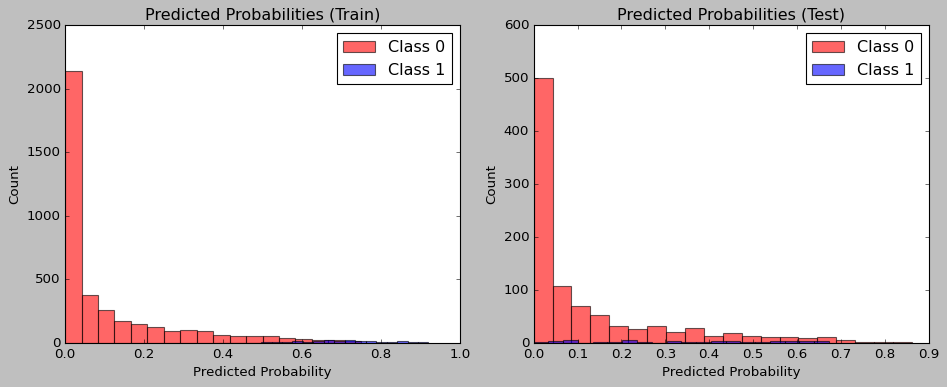

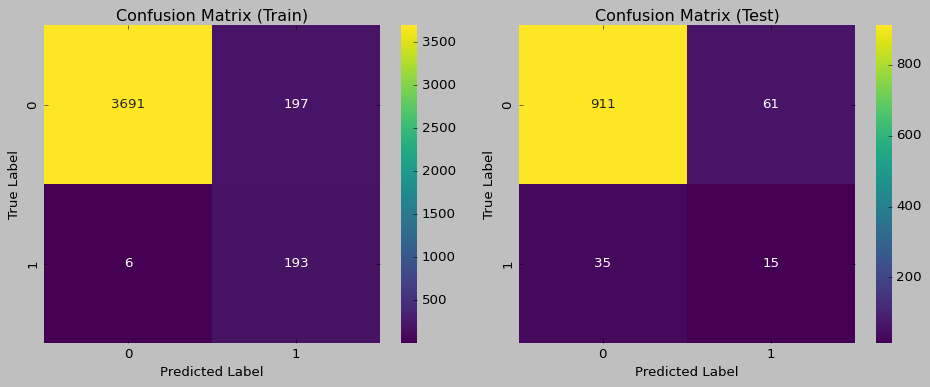

In [91]:
plot_predicted_probabilities(y_train, y_pred_proba_train_rf, y_test, y_pred_proba_test_rf)
plot_confusion_matrices(y_train, y_pred_train_rf, y_test, y_pred_test_rf)

 Найкращі параметри: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


***RandomForestClassifier***

Результати:

На тренувальних даних – дуже високий рівень точності для класу 0 та покращений f1 для класу 1 - 0.66.

На тестових даних – показники для класу 1 значно знижуються, precision - 0.19, recall - 0.28, f1 - 0.23.

***Висновок***:

RandomForest добре працює з більш представленим класом, проте незважаючи на використання зважування класів, продуктивність для меншого класу залишається незадовільною. Це може бути пов’язано з недостатньою кількістю позитивних прикладів для навчання ансамблю.

# ***Аналіз RandomForestClassifier:***

- перенавчання: модель показує високі результати на тренувальних даних з певним зниженням на тестових, що може вказувати на легке перенавчання.

Клас 1: Невелике покращення Precision і Recall для класу 1 порівняно з Decision Tree.

# ***GradientBoostingClassifier***

In [92]:
param_grid_gb = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
}

# param_grid_gb = {
#         'n_estimators': [50],
#         'learning_rate': [0.01],
#         'max_depth': [7],
#         'min_samples_split': [10],
#         'min_samples_leaf': [1],
# }

In [93]:
gb_model = GradientBoostingClassifier(random_state=1)

grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=kf, scoring='balanced_accuracy', n_jobs=-1, verbose=2)

grid_search_gb.fit(X_train, y_train)

print("Найкращі параметри:", grid_search_gb.best_params_)

best_gb_model = grid_search_gb.best_estimator_

# Прогноз на тренувальних даних
y_pred_train_gb = best_gb_model.predict(X_train)
y_pred_proba_train_gb = best_gb_model.predict_proba(X_train)[:, 1]

# Прогноз на тестових даних
y_pred_test_gb = best_gb_model.predict(X_test)
y_pred_proba_test_gb = best_gb_model.predict_proba(X_test)[:, 1]

# Перевірка точності на тренувальних даних
print("\GradientBoostingClassifier on Train Data:")
print(classification_report(y_train, y_pred_train_gb, zero_division=0))
print(confusion_matrix(y_train, y_pred_train_gb))

# Перевірка точності на тестових даних
print("\GradientBoostingClassifier on Test Data:")
print(classification_report(y_test, y_pred_test_gb, zero_division=0))
print(confusion_matrix(y_test, y_pred_test_gb))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Найкращі параметри: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
\GradientBoostingClassifier on Train Data:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3888
           1       0.99      0.60      0.75       199

    accuracy                           0.98      4087
   macro avg       0.99      0.80      0.87      4087
weighted avg       0.98      0.98      0.98      4087

[[3887    1]
 [  80  119]]
\GradientBoostingClassifier on Test Data:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.27      0.06      0.10        50

    accuracy                           0.95      1022
   macro avg       0.61      0.53      0.54      1022
weighted avg       0.92      0.95      0.93      1022

[[964   8]
 [ 47   3]]


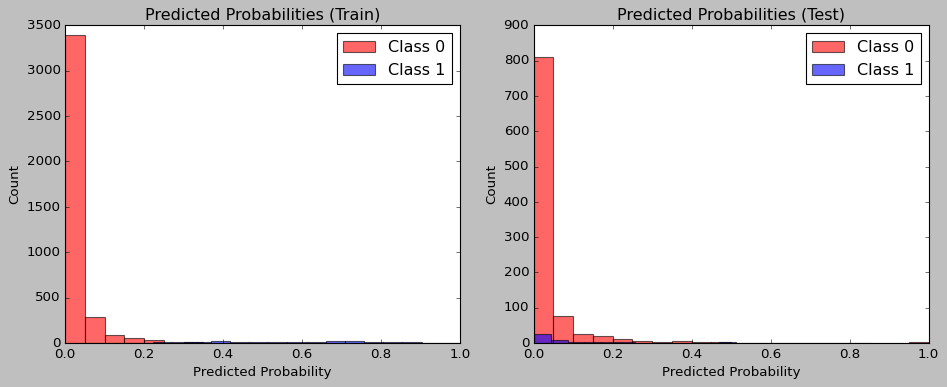

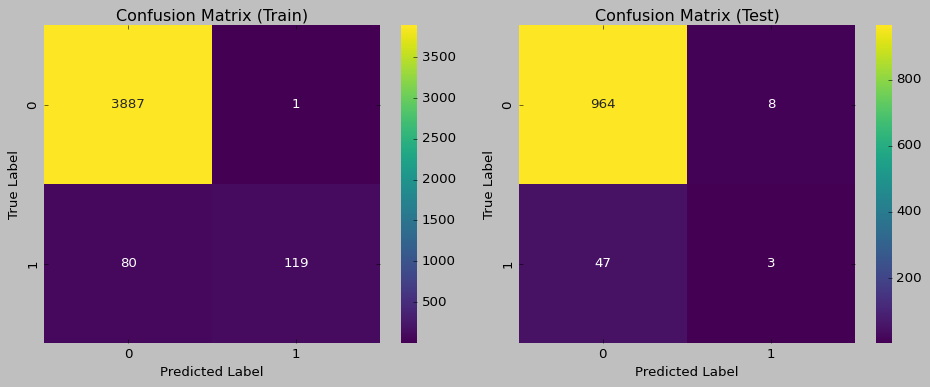

In [94]:
plot_predicted_probabilities(y_train, y_pred_proba_train_gb, y_test, y_pred_proba_test_gb)
plot_confusion_matrices(y_train, y_pred_train_gb, y_test, y_pred_test_gb)

# ***Аналіз GradientBoostingClassifier:***

***Результати***:

Обидва набори (тренувальний і тестовий) демонструють, що модель передбачає тільки клас 0, не "бачачи" позитивний клас (усі позитивні приклади класифікуються як 0).

***Висновок***:

Модель повністю не адаптується до менш представленого класу, що свідчить про те, що градієнтний бустинг може бути дуже чутливим до дисбалансу даних, особливо при використанні стандартних налаштувань.


# ***BalancedRandomForestClassifier***

In [95]:
# Ініціалізація BalancedRandomForestClassifier
brf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=42)

# Навчання моделі
brf_model.fit(X_train, y_train)

# Прогноз на тренувальних даних
y_pred_train_brf = brf_model.predict(X_train)
y_pred_proba_train_brf = brf_model.predict_proba(X_train)[:, 1]

# Прогноз на тестових даних
y_pred_test_brf = brf_model.predict(X_test)
y_pred_proba_test_brf = brf_model.predict_proba(X_test)[:, 1]

# Перевірка точності на тренувальних даних
print("\BalancedRandomForestClassifier on Train Data:")
print(classification_report(y_train, y_pred_train_brf, zero_division=0))
print(confusion_matrix(y_train, y_pred_train_brf))

# Перевірка точності на тестових даних
print("\BalancedRandomForestClassifier on Test Data:")
print(classification_report(y_test, y_pred_test_brf, zero_division=0))
print(confusion_matrix(y_test, y_pred_test_brf))

\BalancedRandomForestClassifier on Train Data:
              precision    recall  f1-score   support

           0       1.00      0.81      0.89      3888
           1       0.21      1.00      0.35       199

    accuracy                           0.82      4087
   macro avg       0.60      0.90      0.62      4087
weighted avg       0.96      0.82      0.87      4087

[[3134  754]
 [   0  199]]
\BalancedRandomForestClassifier on Test Data:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       972
           1       0.15      0.72      0.25        50

    accuracy                           0.79      1022
   macro avg       0.57      0.76      0.57      1022
weighted avg       0.94      0.79      0.85      1022

[[774 198]
 [ 14  36]]


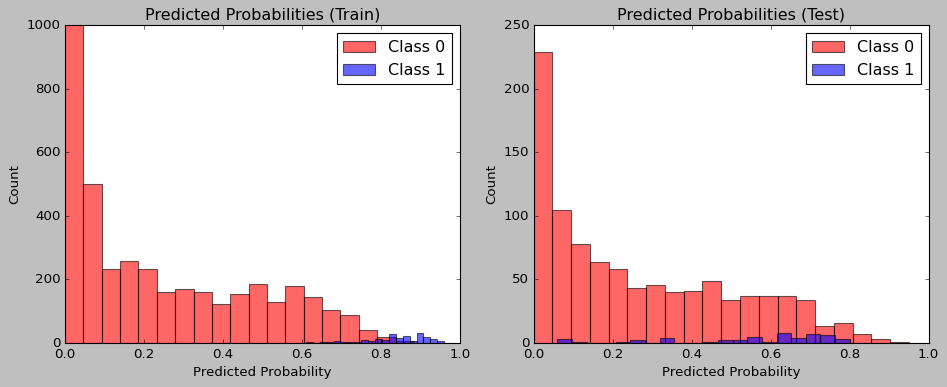

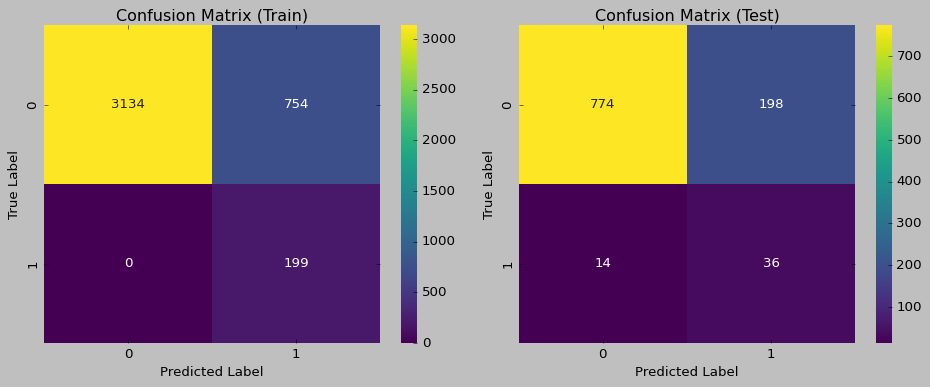

In [96]:
plot_predicted_probabilities(y_train, y_pred_proba_train_brf, y_test, y_pred_proba_test_brf)
plot_confusion_matrices(y_train, y_pred_train_brf, y_test, y_pred_test_brf)

***BalancedRandomForestClassifier***

***Результати***:

На тренувальних даних – для класу 0: високий precision - 1.00 з recall - 0.81, для класу 1 – recall - 1.00, але дуже низький precision - 0.21.

На тестових даних – подібна картина: для класу 1 recall - 0.72, але precision лише 0.15.

***Висновок***:

BalancedRandomForest намагається збалансувати дані шляхом undersampling більшого класу, що дозволяє досягти високого recall для позитивного класу, проте це супроводжується високою кількістю помилкових позитивних спрацьовувань (низька precision). Загальний f1-score для позитивного класу залишається низьким.

Logistic Regression забезпечує стабільну, але загалом недостатню продуктивність для позитивного класу.

Decision Tree та RandomForest демонструють певне покращення для позитивного класу за рахунок високого recall, але низька precision свідчить про надмірне "ловлення" випадкових позитивів.

GradientBoosting не здатен відрізнити позитивний клас, що робить його непридатним у даному сценарії.

BalancedRandomForest може допомогти підвищити recall для позитивного класу, але високий рівень помилкових спрацьовувань негативно впливає на precision.

Якщо основна ціль – не пропустити хворих, тобто мінімізувати false negatives, то ключовою метрикою є ***Recall***, а саме - це чутливість для класу 1.

Recall визначає частку правильно ідентифікованих хворих серед усіх дійсних хворих, що є критично важливим, якщо нас більше турбує ситуація, коли хворого пацієнта відносять як здорового.

Основною метрикою є **Recall** для позитивного класу, тобто, мінімізація false negatives, то з наданих результатів ***LogisticRegression*** демонструє найвищий recall для класу 1 – 0.87 на тестових даних.

Це означає, що 87% хворих пацієнтів були правильно ідентифіковані, що є критично важливим, якщо помилка в діагностиці може призвести до віднесення хворого як здорового.

Однак важливо пам’ятати, що високий recall може супроводжуватися низькою precision - багато хибнопозитивних спрацьовувань. У моєму випадку precision для класу 1 залишається низьким - 0.16, але якщо головна мета – мінімізувати пропущених хворих, то логістична регресія є найбільш придатною.

Основні висновки:

LogisticRegression має recall для класу 1 на тестових даних 0.87, що є найкращим результатом серед усіх моделей.
Інші моделі (Decision Tree, RandomForest, GradientBoosting, BalancedRandomForest) демонструють значно нижчий recall для класу 1 (від 0 до 0.72).

***Тому, якщо основна ціль – не пропустити хворих пацієнтів, то найбільш відповідною моделлю є LogisticRegression.***

# ***Порівняння Моделей***

In [97]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Обчислення метрик для LogisticRegression
precision_train_log = precision_score(y_train, y_pred_train_log)
recall_train_log = recall_score(y_train, y_pred_train_log)
f1_train_log = f1_score(y_train, y_pred_train_log)
accuracy_train_log = accuracy_score(y_train, y_pred_train_log)

precision_test_log = precision_score(y_test, y_pred_test_log)
recall_test_log = recall_score(y_test, y_pred_test_log)
f1_test_log = f1_score(y_test, y_pred_test_log)
accuracy_test_log = accuracy_score(y_test, y_pred_test_log)

# Обчислення метрик для DecisionTree
precision_train_dt = precision_score(y_train, y_pred_train_dt)
recall_train_dt = recall_score(y_train, y_pred_train_dt)
f1_train_dt = f1_score(y_train, y_pred_train_dt)
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)

precision_test_dt = precision_score(y_test, y_pred_test_dt)
recall_test_dt = recall_score(y_test, y_pred_test_dt)
f1_test_dt = f1_score(y_test, y_pred_test_dt)
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)

# Обчислення метрик для RandomForest
precision_train_rf = precision_score(y_train, y_pred_train_rf)
recall_train_rf = recall_score(y_train, y_pred_train_rf)
f1_train_rf = f1_score(y_train, y_pred_train_rf)
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)

precision_test_rf = precision_score(y_test, y_pred_test_rf)
recall_test_rf = recall_score(y_test, y_pred_test_rf)
f1_test_rf = f1_score(y_test, y_pred_test_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

# Обчислення метрик для GradientBoosting
precision_train_gb = precision_score(y_train, y_pred_train_gb)
recall_train_gb = recall_score(y_train, y_pred_train_gb)
f1_train_gb = f1_score(y_train, y_pred_train_gb)
accuracy_train_gb = accuracy_score(y_train, y_pred_train_gb)

precision_test_gb = precision_score(y_test, y_pred_test_gb)
recall_test_gb = recall_score(y_test, y_pred_test_gb)
f1_test_gb = f1_score(y_test, y_pred_test_gb)
accuracy_test_gb = accuracy_score(y_test, y_pred_test_gb)

# Обчислення метрик для Balanced Random Forest
precision_train_brf = precision_score(y_train, y_pred_train_brf)
recall_train_brf = recall_score(y_train, y_pred_train_brf)
f1_train_brf = f1_score(y_train, y_pred_train_brf)
accuracy_train_brf = accuracy_score(y_train, y_pred_train_brf)

precision_test_brf = precision_score(y_test, y_pred_test_brf)
recall_test_brf = recall_score(y_test, y_pred_test_brf)
f1_test_brf = f1_score(y_test, y_pred_test_brf)
accuracy_test_brf = accuracy_score(y_test, y_pred_test_brf)

data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Balanced Random Forest'] * 2,
    'Dataset': ['Train'] * 5 + ['Test'] * 5,
    'precision': [
        precision_train_log, precision_train_dt, precision_train_rf, precision_train_gb, precision_train_brf,
        precision_test_log, precision_test_dt, precision_test_rf, precision_test_gb, precision_test_brf
    ],
    'recall': [
        recall_train_log, recall_train_dt, recall_train_rf, recall_train_gb, recall_train_brf,
        recall_test_log, recall_test_dt, recall_test_rf, recall_test_gb, recall_test_brf
    ],
    'f1_score': [
        f1_train_log, f1_train_dt, f1_train_rf, f1_train_gb, f1_train_brf,
        f1_test_log, f1_test_dt, f1_test_rf, f1_test_gb, f1_test_brf
    ],
    'accuracy': [
        accuracy_train_log, accuracy_train_dt, accuracy_train_rf, accuracy_train_gb, accuracy_train_brf,
        accuracy_test_log, accuracy_test_dt, accuracy_test_rf, accuracy_test_gb, accuracy_test_brf
    ]
}

results = pd.DataFrame(data)
print(results)


                    Model Dataset  precision    recall  f1_score  accuracy
0     Logistic Regression   Train   0.139145  0.834171  0.238506  0.740641
1           Decision Tree   Train   0.443207  1.000000  0.614198  0.938830
2           Random Forest   Train   0.494872  0.969849  0.655348  0.950330
3       Gradient Boosting   Train   0.991667  0.597990  0.746082  0.980181
4  Balanced Random Forest   Train   0.208814  1.000000  0.345486  0.815513
5     Logistic Regression    Test   0.128472  0.740000  0.218935  0.741683
6           Decision Tree    Test   0.141593  0.320000  0.196319  0.871820
7           Random Forest    Test   0.197368  0.300000  0.238095  0.906067
8       Gradient Boosting    Test   0.272727  0.060000  0.098361  0.946184
9  Balanced Random Forest    Test   0.153846  0.720000  0.253521  0.792564


#***Зберігання Моделей та скалера***

In [105]:
output_dir = "saved_models"
os.makedirs(output_dir, exist_ok=True)

joblib.dump(grid_search_log, os.path.join(output_dir, "LogisticRegression.pkl"))
joblib.dump(grid_search_dt, os.path.join(output_dir, "DecisionTreeClassifier.pkl"))
joblib.dump(grid_search_rf, os.path.join(output_dir, "RandomForestClassifier.pkl"))
joblib.dump(grid_search_gb, os.path.join(output_dir, "GradientBoostingClassifier.pkl"))
joblib.dump(brf_model, os.path.join(output_dir, "BalancedRandomForestClassifier.pkl"))

joblib.dump(encoder, os.path.join(output_dir, 'encoder.pkl'))
joblib.dump(scaler, os.path.join(output_dir, "scaler.pkl"))

print(f"Models and scalers saved in folder: {output_dir}")

Models and scalers saved in folder: saved_models


In [106]:
# Loading all files from the folder
for filename in os.listdir(output_dir):
    files.download(os.path.join(output_dir, filename))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>